In [4]:
from pprint import pprint
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob
import xml.etree.ElementTree as ET
from scipy.signal import savgol_filter
import gc
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

In [5]:
# Distance betwen moon and sun in AUs
D_AU = 1

In [6]:
# Solar irradiance
F0 = np.array([
  136.1259307,
  129.8781929,
  125.1457188,
  120.4566749,
  115.2187742,
  110.7989129,
  105.971862,
  102.2853476,
  98.83159112,
  95.00990644,
  91.72241746,
  88.63043389,
  85.44216416,
  83.09659958,
  80.7461688,
  77.99745659,
  75.43755054,
  72.53298554,
  70.30310472,
  67.71506702,
  65.53063581,
  63.51647332,
  61.49193881,
  59.39769145,
  57.24811211,
  55.56974549,
  53.96628612,
  52.39858882,
  50.94286582,
  49.55873832,
  47.99340839,
  46.35543865,
  45.11640663,
  43.75374359,
  42.46741487,
  41.1950428,
  39.93375405,
  38.7480202,
  37.63257797,
  36.52968828,
  35.48372942,
  34.51571377,
  33.5041102,
  32.62925225,
  31.80035805,
  30.98128654,
  30.16775831,
  29.32709974,
  28.56074168,
  27.8298174,
  27.0453247,
  26.30808675,
  25.51810387,
  24.75010497,
  24.00573968,
  23.24760491,
  22.51761852,
  21.78398871,
  21.06792047,
  20.39822233,
  19.7458807,
  19.11661541,
  18.44061437,
  17.83250529,
  17.26068394,
  16.65126453,
  16.11545704,
  15.61912435,
  15.1210474,
  14.62910738,
  14.16359209,
  13.72237684,
  13.31430194,
  12.94713935,
  12.56233275,
  12.18239943,
  11.79722098,
  11.38810049,
  11.04636914,
  10.71621297,
  10.38904988,
  10.06620698,
  9.753295821,
  9.46418631,
  9.201075776,
  8.960974818,
  8.732115834,
  8.508712424,
  8.28861478,
  8.070068082,
  7.850866176,
  7.629585176,
  7.417896212,
  7.21399149,
  7.014245694,
  6.819995994,
  6.637200746,
  6.463212542,
  6.291676014,
  6.122400975,
  5.952327234,
  5.785907458,
  5.631916792,
  5.48221029,
  5.338864421,
  5.183886388,
  5.053359936,
  4.941756508,
  4.835098184,
  4.719922707,
  4.619729215,
  4.511137419,
  4.407240202,
  4.306184976,
  4.210413629,
  4.117013411,
  4.012368768,
  3.918726643,
  3.824014432,
  3.725826304,
  3.646586732,
  3.564719937,
  3.488199195,
  3.397463341,
  3.32250234,
  3.262984894,
  3.190955311,
  3.122692223,
  3.056477464,
  2.991274348,
  2.926566072,
  2.864612339,
  2.802940836,
  2.743157021,
  2.685370618,
  2.628641884,
  2.571929704,
  2.517226294,
  2.465127643,
  2.414375576,
  2.365285234,
  2.316701141,
  2.26923212,
  2.222564505,
  2.178496705,
  2.135290025,
  2.092826765,
  2.051565701,
  2.010893773,
  1.971470582,
  1.932492639,
  1.893925453,
  1.853239032,
  1.814419696,
  1.780829606,
  1.751599126,
  1.715922793,
  1.680125966,
  1.647791753,
  1.621454182,
  1.593640531,
  1.560460708,
  1.532378246,
  1.507178355,
  1.480349348,
  1.454525518,
  1.426003985,
  1.40026592,
  1.376814112,
  1.351395724,
  1.327241488,
  1.303320437,
  1.279240078,
  1.255715058,
  1.232621586,
  1.209534773,
  1.186777237,
  1.163774025,
  1.141839466,
  1.121354795,
  1.102697582,
  1.084984542,
  1.06779729,
  1.050654559,
  1.034116451,
  1.018239678,
  1.003106371,
  0.987228033,
  0.971082552,
  0.954532246,
  0.938549781,
  0.922761605,
  0.90746215,
  0.892772367,
  0.876952832,
  0.86169586,
  0.846904043,
  0.832961745,
  0.820193322,
  0.808495532,
  0.796418017,
  0.784036511,
  0.771772032,
  0.760169612,
  0.74902997,
  0.737997332,
  0.727055348,
  0.716477866,
  0.704633464,
  0.691770452,
  0.681177697,
  0.668685204,
  0.6563386,
  0.643784606,
  0.630929839,
  0.618670348,
  0.605670184,
  0.593191697,
  0.582320158,
  0.571630629,
  0.561438106,
  0.551831735,
  0.542986524,
  0.534529199,
  0.526707332,
  0.518722109,
  0.511109087,
  0.50373316,
  0.496221855,
  0.489530981,
  0.482582186,
  0.475974536,
  0.469794569,
  0.463575699,
  0.458286546,
  0.452850271,
  0.447197638,
  0.441572082,
  0.43580287,
  0.430755766,
  0.425717099,
  0.420589447,
  0.41588213,
  0.410468477,
  0.405233536,
  0.399887123,
  0.394668014,
  0.389642973,
  0.384580319,
  0.379611238,
  0.374544041,
  0.369613524,
  0.364863435,
  0.360132602,
  0.355533758,
  0.350967069,
]).reshape(256,1,1)


In [7]:
class utils:
    @staticmethod
    def _extract_sequence_numbers(file_path):
        """
        Extracts the text content of <sequence_number> elements from an XML file.

        Args:
            file_path (str): The path to the XML file.

        Returns:
            list: A list of text contents from <sequence_number> elements.
        """
        # Parse the XML file
        tree = ET.parse(file_path)
        root = tree.getroot()

        # Find all sequence_number elements
        sequence_numbers = root.findall('.//{http://pds.nasa.gov/pds4/pds/v1}elements')

        # Extract the text content from each <sequence_number> element
        return [int(sequence_number.text) for sequence_number in sequence_numbers]
    @staticmethod
    def _find_xml_files(base_path):
        """
        Finds all XML files matching the pattern /data/calibrated/*/*.xml within the given base path.

        Args:
            base_path (str): The base directory path where the search begins.

        Returns:
            list: A list of paths to the matching XML files.
        """
        # Define the search pattern
        pattern = os.path.join(base_path, 'data', 'calibrated', '*', '*.xml')

        # Use glob to find all files matching the pattern
        matching_files = glob.glob(pattern)
        matching_files.sort()
        return matching_files
    
    @staticmethod
    def _find_qub_files(base_path):
        """
        Finds all .qub files matching the pattern /data/calibrated/*/*.qub within the given base path.

        Args:
            base_path (str): The base directory path where the search begins.

        Returns:
            list: A list of paths to the matching .qub files.
        """
        # Define the search pattern
        pattern = os.path.join(base_path, 'data', 'calibrated', '*', '*.qub')

        # Use glob to find all files matching the pattern
        matching_files = glob.glob(pattern)
        matching_files.sort()
        return matching_files
    @staticmethod
    def _get_image_array(qub_path,shape):
        """
        Args:
            qub_path : path to the .qub file
            shape : shape of the image of form (channels,height,width)
        returns:
            a numpy array reshaped in the shape provided
        """
        with open(qub_path, 'rb') as f:
            img = np.frombuffer(f.read(), dtype=np.float32).reshape(*shape)
        return img

    @staticmethod
    def get_image(base_path):
        """
        Args:
            base_path : Base directory path to the data. Which means the path to directory which contains the browse, data geometyr and miscellaneous folder
        returns:
            A list of images with the radiance resized and resahped. To visualize it you need to do min max scaling and stuff
        """
        xml_files = utils._find_xml_files(base_path)
        image_files = utils._find_qub_files(base_path)
        shapes = [utils._extract_sequence_numbers(xml_file) for xml_file in xml_files]
        images = [utils._get_image_array(qub_path,shape) for qub_path,shape in zip(image_files,shapes)]
        return images
    @staticmethod
    def _read_misc_files_into_df(file_path):
        with open(file_path) as f:
            data = f.read()
        rows = data.split('\n')
        parsed_list = [' '.join(row.split()).split() for row in rows]
        return pd.DataFrame(parsed_list)
    
    @staticmethod
    def _get_misc_files(base_path):
        """
        Args:
            base_path : Base directory path to the data. Which means the path to directory which contains the browse, data geometyr and miscellaneous folder
        returns:
            A dictionary of miscellaneous files converted to the dataframe 
        """
        pattern = os.path.join(os.path.join(base_path, 'miscellaneous', 'calibrated', '*', '*.*'))
        matching_files = glob.glob(pattern)
        matching_files.sort()
        
        dfs = {}
        for file_path in matching_files:
            print(file_path)
            _, file_extension = os.path.splitext(file_path)
            dfs[file_extension] = utils._read_misc_files_into_df(file_path).dropna()
        return dfs
    @staticmethod
    def get_misc_files(base_path):
        """
        Args:
            base_path : Base directory path to the data. Which means the path to directory which contains the browse, data geometyr and miscellaneous folder
        returns:
            A dictionary of miscellaneous files converted to the dataframe 
        """
        
        dfs = utils._get_misc_files(base_path)
        dfs['.spm'] = utils._process_spm_df(dfs['.spm'])
        dfs['.oat'] = utils._process_oat_df(dfs['.oat'])
        return dfs
    @staticmethod
    def convert_to_reflectance(data, solar_zenith_angle):
        return (np.pi * data)/(np.cos(solar_zenith_angle * np.pi / 180) * F0 * D_AU**2)
    
    @staticmethod
    def _process_spm_df(spm_df):
        column_names = [
            "Record type", "Physical record number", "Block length",
        #     "Year",
            "Month",
            "Date",
            "Hour",
            "Minute",
            "Second",
            "Millisec", "Satellite position X", "Satellite position Y",
            "Satellite position Z", "Satellite velocity X-dot",
            "Satellite velocity Y-dot", "Satellite velocity Z-dot",
            "Phase angle", "Sun aspect", "Sun Azimuth",
            "Sun Elevation",
        ]

        # Assign the new column names
        spm_df.columns = column_names

        # Convert the columns to the appropriate data types
        spm_df["Record type"] = spm_df["Record type"].astype(str)
        spm_df["Physical record number"] = spm_df["Physical record number"].astype(np.int32)
        spm_df["Block length"] = spm_df["Block length"].astype(np.int32)
        # spm_df['Year'] = spm_df['Year'].astype(np.int32)
        spm_df['Month'] = spm_df['Month'].astype(np.int32)
        spm_df['Date'] = spm_df['Date'].astype(np.int32)
        spm_df['Hour'] = spm_df['Hour'].astype(np.int32)
        spm_df['Minute'] = spm_df['Minute'].astype(np.int32)
        spm_df['Second'] = spm_df['Second'].astype(np.int32)
        spm_df['Millisec'] = spm_df['Millisec'].astype(np.int32)
        # For "Time in UTC", assuming it is in the format 'YYYYMMDDHHMMSS', convert to datetime

        spm_df["Satellite position X"] = spm_df["Satellite position X"].astype(np.float32)
        spm_df["Satellite position Y"] = spm_df["Satellite position Y"].astype(np.float32)
        spm_df["Satellite position Z"] = spm_df["Satellite position Z"].astype(np.float32)
        spm_df["Satellite velocity X-dot"] = spm_df["Satellite velocity X-dot"].astype(np.float32)
        spm_df["Satellite velocity Y-dot"] = spm_df["Satellite velocity Y-dot"].astype(np.float32)
        spm_df["Satellite velocity Z-dot"] = spm_df["Satellite velocity Z-dot"].astype(np.float32)
        spm_df["Phase angle"] = spm_df["Phase angle"].astype(np.float32)
        spm_df["Sun aspect"] = spm_df["Sun aspect"].astype(np.float32)
        spm_df["Sun Azimuth"] = spm_df["Sun Azimuth"].astype(np.float32)
        spm_df["Sun Elevation"] = spm_df["Sun Elevation"].astype(np.float32)
        # spm_df["Orbit Limb Direction"] = spm_df["Orbit Limb Direction"].astype(int)
        return spm_df
    @staticmethod
    def _process_oat_df(oat_df):   
        columns_names = [   
            "Record type",
            "Physical record number in this file",
            "Block length in bytes",
            "Month",
            "Date",
            "Hour",
            "Minute",
            "Second",
            "Millisec",
            "Lunar Position X (kms) - J2000 Earth Centre Frame",
            "Lunar Position Y (kms) - J2000 Earth Centre Frame",
            "Lunar Position Z (kms) - J2000 Earth Centre Frame",
            "Satellite position X (kms) - Note-3",
            "Satellite position Y (kms) - Note-3",
            "Satellite position Z (kms) - Note-3",
            "Satellite velocity X-dot (kms/sec) - Note-3",
            "Satellite velocity Y-dot (kms/sec) - Note-3",
            "Satellite velocity Z-dot (kms/sec)  - Note-3",
            "Altitude Inertial Q1",
            "Altitude Inertial Q2",
            "Altitude Inertial Q3",
            "Altitude Inertial Q4",
            "Earth Fixed IAU frame Q1",
            "Earth Fixed IAU frame Q2",
            "Earth Fixed IAU frame Q3",
            "Earth Fixed IAU frame Q4"
            "Lunar Fixed IAU frame Q1",
            "Lunar Fixed IAU frame Q2",
            "Lunar Fixed IAU frame Q3",
            "Lunar Fixed IAU frame Q4",
            "Latitude of sub-satellite point (deg)",
            "Longitude of sub-satellite point (deg)",
            "Solar Azimuth",
            "Solar Elevation",
            "Latitude  (deg)",
            "Longitude (deg)",
            "Satellite altitude (kms)",
            "Angle between +Roll and Velocity Vector",
            "Eclipse Status - Note-4",
            "Emission Angle",
            "Sun Angle w.r.t -ve Yaw (Phase angle)",
            "Angle between +Yaw and Nadir",
            "Slant Range (Km)",
            "Orbit No",
            "Solar Zenith Angle",
            "Angle between Payload FoV axis and velocity vector",
            "X  (yaw) angle",
            "Y  (roll) angle",
            "Z(pitch) angle",
        ]
        oat_df.columns = columns_names
        oat_df.iloc[:,1:9] = oat_df.iloc[:,1:9].astype(np.int32)
        oat_df.iloc[:,9:42] = oat_df.iloc[:,9:42].astype(np.float32)
        oat_df.iloc[:,42] = oat_df.iloc[:,42].astype(np.int32)
        oat_df.iloc[:,43:] = oat_df.iloc[:,43:].astype(np.float32)
        return oat_df
            
        
        
        

## Denoising Function : Savitzky-Golay filter

In [8]:
def denoise(data, axis, window_size = 7, polyorder = 2):
    denoised_image = savgol_filter(data, window_length=window_size, polyorder=polyorder, axis=axis)
    return denoised_image

In [9]:
# data path should be root directory of the bundle
data_path = "/kaggle/input/isro-chandrayan-iirs/other/dataset-26/2/ch2_iir_nci_20191217T0003248322_d_img_d18"
images = utils.get_image(data_path)
image = images[0]
misc_dfs = utils.get_misc_files(data_path)
oat_df = misc_dfs['.oat']
mean_zenith_angle = oat_df.loc[:,'Solar Zenith Angle'].mean()
reflectance_image = utils.convert_to_reflectance(image,mean_zenith_angle)
# reflectance image is the desired output

/kaggle/input/isro-chandrayan-iirs/other/dataset-26/2/ch2_iir_nci_20191217T0003248322_d_img_d18/miscellaneous/calibrated/20191217/ch2_iir_nci_20191217T0003248322_d_img_d18.lbr
/kaggle/input/isro-chandrayan-iirs/other/dataset-26/2/ch2_iir_nci_20191217T0003248322_d_img_d18/miscellaneous/calibrated/20191217/ch2_iir_nci_20191217T0003248322_d_img_d18.oat
/kaggle/input/isro-chandrayan-iirs/other/dataset-26/2/ch2_iir_nci_20191217T0003248322_d_img_d18/miscellaneous/calibrated/20191217/ch2_iir_nci_20191217T0003248322_d_img_d18.oath
/kaggle/input/isro-chandrayan-iirs/other/dataset-26/2/ch2_iir_nci_20191217T0003248322_d_img_d18/miscellaneous/calibrated/20191217/ch2_iir_nci_20191217T0003248322_d_img_d18.spm


In [10]:
denoised_reflectance_image = denoise(reflectance_image, 0)

In [11]:
# del denoised_reflectance_image;  gc.collect()

In [12]:
# combined_array = np.concatenate((denoised_reflectance_image[7:62, 7, 7], denoised_reflectance_image[72:115, 7, 7]))
# plt.plot(combined_array)

## interpolation of OSF region

In [13]:
combined_array = np.concatenate((denoised_reflectance_image[7:68, 7, 7], denoised_reflectance_image[77:115, 7, 7]))

original_indices = np.concatenate((np.arange(7, 68), np.arange(77, 115)))

interpolated_indices = np.arange(7, 115)

cubic_spline = CubicSpline(original_indices, combined_array)

interpolated_array = cubic_spline(interpolated_indices)

## add noise


In [14]:
def add_noise(data, max_noise):
    
    # Add noise to reflectance data
#     noise = np.random.normal(0, 0.005,size=reflectance_vectors['bir1lm054_Breccia__Lunar_Feldspathic_Breccia'].shape)
#     reflectance_noisy = reflectance_vectors['bir1lm054_Breccia__Lunar_Feldspathic_Breccia'] + noise

    wavelength = range(data.shape[0])
    low_freq_wavelength = np.linspace(0, data.shape[0], 30)  # Fewer points
    low_freq_noise = np.random.normal(0, max_noise, size=low_freq_wavelength.shape)

    # Interpolate the low-frequency noise to match the wavelength data
    interp_noise = interp1d(low_freq_wavelength, low_freq_noise, kind='linear')
    noise = interp_noise(wavelength)
    # Plot the noisy reflectance data
    reflectance_noisy = data + noise
    return reflectance_noisy

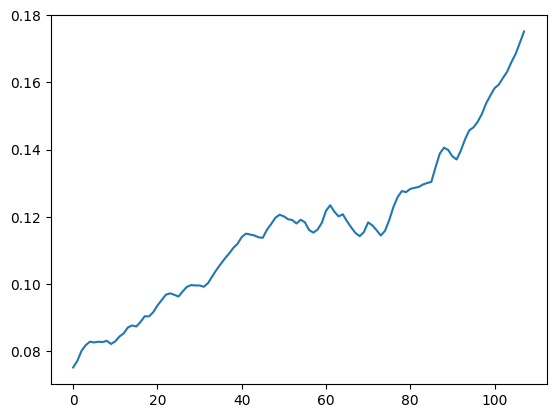

In [15]:
plt.plot(denoised_reflectance_image[7:115, 1000, 200])

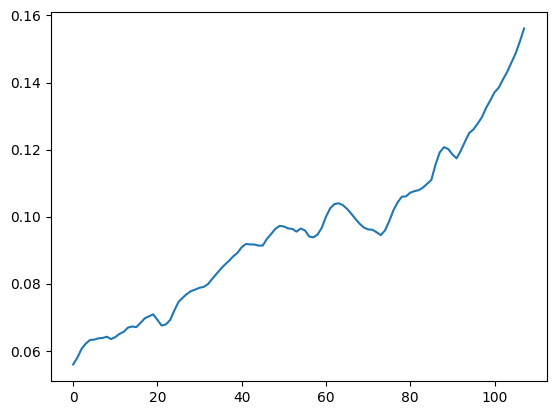

In [16]:
plt.plot(interpolated_array)

In [17]:
# interpolated_df = pd.read_csv('/kaggle/input/interpolated-data/bir1lm044_Silicate_(Ino)__Pyroxene__from_lunar_basalt.csv')
# interpolated_reflectance = interpolated_df['Reflectance'].values

import glob
import os

folder_path = '/kaggle/input/interpolated-data'

csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

reflectance_vectors = {}
reflectance_vectors_noise_25 = {}
reflectance_vectors_noise_5 = {}

for file in csv_files:
    filename = os.path.splitext(os.path.basename(file))[0]
    
    df = pd.read_csv(file)
    
    reflectance_vectors[filename] = df['Reflectance'].values[1:]
    reflectance_vectors_noise_25[filename] = add_noise(df['Reflectance'].values[1:], 0.0025)   
    reflectance_vectors_noise_5[filename] = add_noise(df['Reflectance'].values[1:], 0.005)   

In [18]:
def spectral_angle_mapper(pixel_vector, reference_vector):
    
    dot_product = np.dot(pixel_vector, reference_vector)
    
    norm_pixel = np.linalg.norm(pixel_vector)
    
    norm_reference = np.linalg.norm(reference_vector)
    
    cosine_angle = dot_product / (norm_pixel * norm_reference)
    
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    
    return angle


In [19]:
sam = {}
sam_noise_25 = {}
sam_noise_5 = {}

for key1, key2, key3 in zip(reflectance_vectors.keys(), 
                            reflectance_vectors_noise_25.keys(), 
                            reflectance_vectors_noise_5.keys()):
    sam[key1] = spectral_angle_mapper(denoised_reflectance_image[7:115, 1000, 200], reflectance_vectors[key1])
    sam_noise_25[key2] = spectral_angle_mapper(denoised_reflectance_image[7:115, 1000, 200], reflectance_vectors_noise_25[key2])    
    sam_noise_5[key3] = spectral_angle_mapper(denoised_reflectance_image[7:115, 1000, 200], reflectance_vectors_noise_5[key3])


In [20]:
sam

{'c2mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.26234734824433403,
 'bir1lm046_unbrecciated_lunar_meteorite__coarse_texture': 0.1825719049585525,
 'c1lm36_Igneous__Lunar_Unbrecciated_Basalt_': 0.26076203401679204,
 'cclm35_Breccia__Lunar_Feldspathic_Breccia': 0.2556124697162266,
 'c10l01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.24344711263092272,
 'c3mb29_Silicate_(Ino)__Pyroxene__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.40429636322642726,
 'colm01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.2634747402331538,
 'c12lm1_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.22633572765966495,
 'c6mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.29701360841758273,
 'bir1lm048_Mare_basalt': 0.16115619776886603,
 'cama01_Anomalous_(ACANOM)__Antarctic_meteorite_of_presumed_lunar_origin': 0.20958037191047235,
 'calm34_Breccia__Lunar_Feldspathic_Breccia': 0.28726072447473316,
 'cflm

In [21]:
sam_noise_25

{'c2mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.26030971155621885,
 'bir1lm046_unbrecciated_lunar_meteorite__coarse_texture': 0.18223921861704012,
 'c1lm36_Igneous__Lunar_Unbrecciated_Basalt_': 0.26527061175914574,
 'cclm35_Breccia__Lunar_Feldspathic_Breccia': 0.25695663984383665,
 'c10l01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.2422568854538411,
 'c3mb29_Silicate_(Ino)__Pyroxene__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.406512747541019,
 'colm01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.25942278785096595,
 'c12lm1_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.22949414679663155,
 'c6mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.3005600051670467,
 'bir1lm048_Mare_basalt': 0.159544747780975,
 'cama01_Anomalous_(ACANOM)__Antarctic_meteorite_of_presumed_lunar_origin': 0.20872258111969536,
 'calm34_Breccia__Lunar_Feldspathic_Breccia': 0.2868064437826109,
 'cflm34_B

In [22]:
sam_noise_5

{'c2mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.2561143015091069,
 'bir1lm046_unbrecciated_lunar_meteorite__coarse_texture': 0.18872816376522894,
 'c1lm36_Igneous__Lunar_Unbrecciated_Basalt_': 0.256386834549953,
 'cclm35_Breccia__Lunar_Feldspathic_Breccia': 0.2725709505485384,
 'c10l01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.25091180391199697,
 'c3mb29_Silicate_(Ino)__Pyroxene__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.40586251323672856,
 'colm01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.2606540431799786,
 'c12lm1_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 0.23073872030460588,
 'c6mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 0.301161985183611,
 'bir1lm048_Mare_basalt': 0.1637584225067206,
 'cama01_Anomalous_(ACANOM)__Antarctic_meteorite_of_presumed_lunar_origin': 0.19827181583580203,
 'calm34_Breccia__Lunar_Feldspathic_Breccia': 0.2888559663841911,
 'cflm34_Bre

In [23]:
temp = min(sam.values())
res = [key for key in sam if sam[key] == temp]

temp25 = min(sam_noise_25.values())
res25 = [key for key in sam_noise_25 if sam_noise_25[key] == temp25]

temp5 = min(sam_noise_5.values())
res5 = [key for key in sam_noise_5 if sam_noise_5[key] == temp5]


In [24]:
print(temp, res)
print(temp25, res25)
print(temp5, res5)

0.07368270627196831 ['calmc2_Antarctic_Meteorite_of_Presumed_Lunar_Origin']
0.07690445215674684 ['calmc2_Antarctic_Meteorite_of_Presumed_Lunar_Origin']
0.07330948389031006 ['calmc2_Antarctic_Meteorite_of_Presumed_Lunar_Origin']


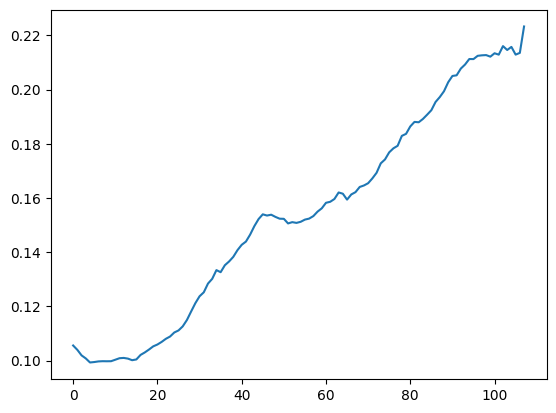

In [25]:
plt.plot(reflectance_vectors_noise_25['calmc2_Antarctic_Meteorite_of_Presumed_Lunar_Origin'])

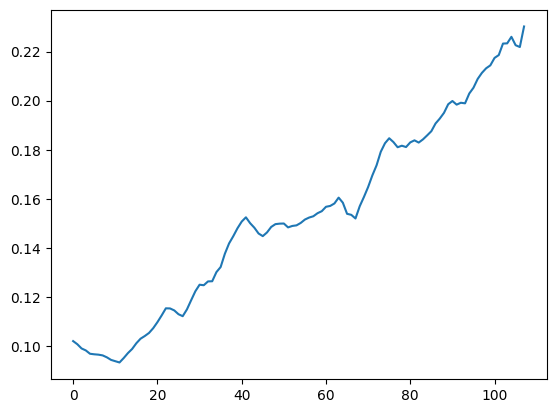

In [26]:
plt.plot(reflectance_vectors_noise_5['calmc2_Antarctic_Meteorite_of_Presumed_Lunar_Origin'])

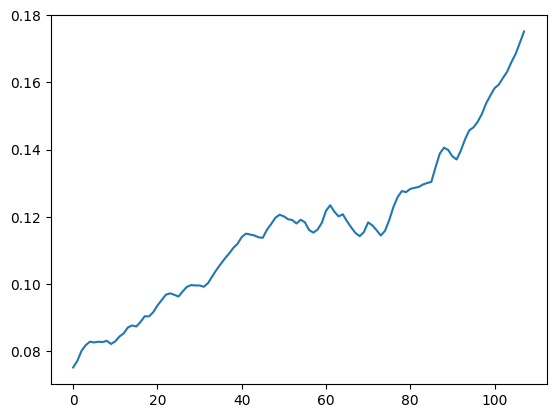

In [27]:
plt.plot(denoised_reflectance_image[7:115, 1000, 200])

In [28]:
min_sam_key = min(reflectance_vectors.keys(), key=lambda k: sam[list(reflectance_vectors.keys()).index(k)])
min_sam_key

KeyError: 0

In [72]:
# Create a list of tuples with (key, sam_value)
sam_key_pairs = list(reflectance_vectors.keys())

# Sort the list based on the SAM values
sorted_sam_key_pairs = sorted(sam_key_pairs, key=lambda k: sam[sam_key_pairs.index(k)])

# Extract the minimum 5 pairs
min_5_sam_key_pairs = sorted_sam_key_pairs[:5]

# Get the corresponding SAM values for these keys
min_5_sam_values = [sam[sam_key_pairs.index(k)] for k in min_5_sam_key_pairs]

# Combine them into a list of tuples (key, sam_value)
min_5_results = list(zip(min_5_sam_key_pairs, min_5_sam_values))

min_5_results


[('calmc2_Antarctic_Meteorite_of_Presumed_Lunar_Origin', 0.07368270627196831),
 ('calmca_Antarctic_Meteorite_of_Presumed_Lunar_Origin', 0.07847614707398592),
 ('bir1lm054_Breccia__Lunar_Feldspathic_Breccia', 0.0835425883809933),
 ('calmcr_Antarctic_Meteorite_of_Presumed_Lunar_Origin', 0.0841094775032077),
 ('cpmb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite',
  0.08428332167762563)]

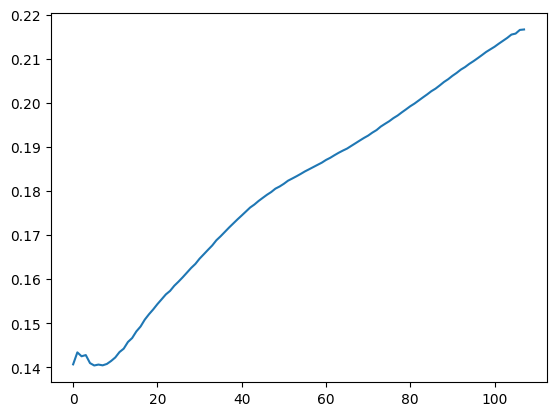

In [73]:
plt.plot(reflectance_vectors['bir1lm054_Breccia__Lunar_Feldspathic_Breccia'])

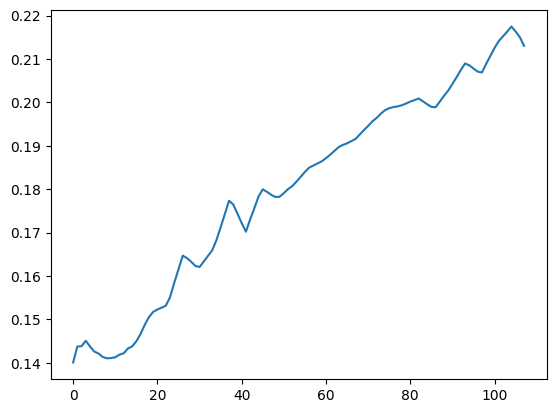

In [105]:
import numpy as np
import matplotlib.pyplot as plt


# plt.plot(reflectance_noisy)


In [75]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create a plotly figure
fig = go.Figure()

# Loop over each key in the dictionary and add a line plot for each
for key, vector in reflectance_vectors.items():
    fig.add_trace(go.Scatter(y=vector, mode='lines', name=key))

# Customize layout
fig.update_layout(
    title="Reflectance Vectors",
    xaxis_title="Wavelength",
    yaxis_title="Reflectance",
    showlegend=True
)

# Show the figure
pyo.plot(fig)


'temp-plot.html'

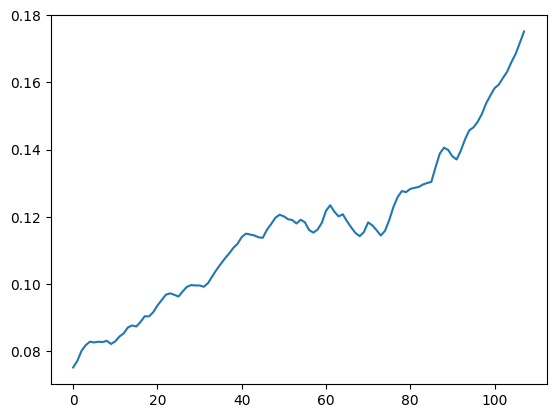

In [74]:
import matplotlib.pyplot as plt

plt.plot(denoised_reflectance_image[7:115, 1000, 200])

In [3]:
plt.plot(reflectance_vectors[min_sam_key])

NameError: name 'plt' is not defined

In [26]:
max_sam_key = max(reflectance_vectors.keys(), key=lambda k: sam[list(reflectance_vectors.keys()).index(k)])
max_sam_key

'c3mb29_Silicate_(Ino)__Pyroxene__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite'

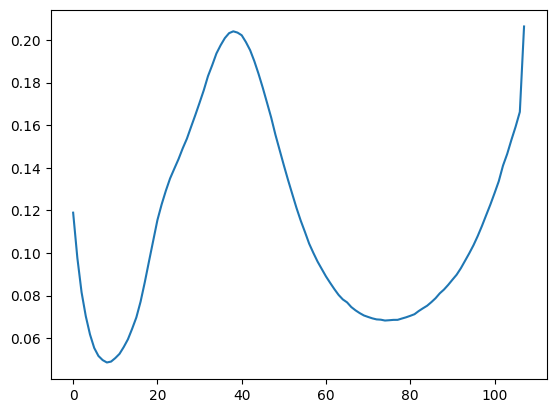

In [27]:
plt.plot(reflectance_vectors[max_sam_key])

In [45]:
SAM = np.zeros((5, 5, len(reflectance_vectors)))

for i in range(10000, 10005):
    for j in range(100, 105):
        for k, v in enumerate(reflectance_vectors.values()):
            SAM[i - 10000, j - 100, k] = spectral_angle_mapper(reflectance_image[7:115, i, j], v)


In [46]:
SAM

array([[[0.31590569, 0.23851635, 0.31192783, ..., 0.25022716,
         0.30881818, 0.26119096],
        [0.31368341, 0.23613191, 0.30972014, ..., 0.24766726,
         0.30599722, 0.25830321],
        [0.31094703, 0.23312169, 0.30692437, ..., 0.24470094,
         0.30304179, 0.25517423],
        [0.31380457, 0.23615154, 0.3097159 , ..., 0.24797507,
         0.30667356, 0.2588868 ],
        [0.31609226, 0.23866319, 0.31208122, ..., 0.25059408,
         0.30908073, 0.26145042]],

       [[0.31564148, 0.2381912 , 0.31171761, ..., 0.24990554,
         0.30863233, 0.26103509],
        [0.31396327, 0.23636349, 0.31002019, ..., 0.24794527,
         0.30634838, 0.25864705],
        [0.31232972, 0.23477165, 0.30844325, ..., 0.24643688,
         0.30507962, 0.25746248],
        [0.31536437, 0.23787968, 0.31139914, ..., 0.24968947,
         0.30837015, 0.26073931],
        [0.31719415, 0.23980885, 0.31322303, ..., 0.25141122,
         0.31012204, 0.26252107]],

       [[0.31502401, 0.23762248, 0.3

In [47]:
max_indices = np.argmax(SAM, axis=2)
min_indices = np.argmin(SAM, axis=2)

In [48]:
max_indices

array([[5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5]])

In [49]:
min_indices

array([[72, 72, 72, 72, 72],
       [72, 72, 72, 72, 72],
       [72, 72, 72, 72, 72],
       [72, 72, 72, 72, 72],
       [72, 72, 72, 72, 72]])

In [ ]:
plt.plot(reflectance_image[7:115, 0, 0])

In [ ]:
plt.plot(reflectance_vectors[list(reflectance_vectors.keys())[72]])

In [ ]:
list(reflectance_vectors.keys())[5]

In [ ]:
plt.plot(reflectance_vectors[list(reflectance_vectors.keys())[5]])

In [ ]:
min_sam = np.min(SAM, axis=2)
min_sam

In [ ]:
min_value = np.min(SAM)

min_coords = np.unravel_index(np.argmin(SAM), SAM.shape)

In [ ]:
min_value

In [ ]:
min_coords

In [ ]:
plt.plot(reflectance_image[7:115, 153, 248])

In [ ]:
plt.plot(reflectance_vectors[list(reflectance_vectors.keys())[76]])

In [ ]:
import torch

# Convert the reflectance image and reflectance vectors to PyTorch tensors
reflectance_image_tensor = torch.tensor(reflectance_image[7:115, :, :], dtype=torch.float32).cuda()
reflectance_vectors_tensor = torch.tensor([v for v in reflectance_vectors.values()], dtype=torch.float32).cuda()

# Initialize a 3D tensor for SAM with the same spatial dimensions as the reflectance_image
SAM = torch.zeros((reflectance_image.shape[1], reflectance_image.shape[2], len(reflectance_vectors))).cuda()

# Define the spectral_angle_mapper function for GPU usage
def spectral_angle_mapper_gpu(pixel_vector, ref_vector):
    dot_product = torch.dot(pixel_vector, ref_vector)
    norm_pixel = torch.norm(pixel_vector)
    norm_ref = torch.norm(ref_vector)
    angle = torch.acos(dot_product / (norm_pixel * norm_ref))
    return angle

# Calculate the SAM value for each pixel and store it in the SAM tensor
for i in range(reflectance_image.shape[1]):
    for j in range(reflectance_image.shape[2]):
        pixel_vector = reflectance_image_tensor[:, i, j]  # Get the spectral vector for pixel (i, j)
        for k, ref_vector in enumerate(reflectance_vectors_tensor):
            SAM[i, j, k] = spectral_angle_mapper_gpu(pixel_vector, ref_vector)
            
    if i % 1000 == 0:
        print(f'Processing row {i}/{reflectance_image.shape[1]}')

# If needed, move the SAM tensor back to CPU and convert it to a NumPy array
SAM_cpu = SAM.cpu().numpy()


In [ ]:
SAM.shape

In [ ]:
SAM

In [ ]:
min_sam_key = min(reflectance_vectors.keys(), key=lambda k: SAM[list(reflectance_vectors.keys()).index(k)])
min_sam_key

In [ ]:
# SAM = spectral_angle_mapper(reflectance_image[7:115, 0, 0], interpolated_reflectance)

In [ ]:
# SAM

# CPRSM


In [38]:
import numpy as np

def CPRMS(pixel_vector, reference_vector):
    
    mean_pixel = np.mean(pixel_vector)
    mean_reference = np.mean(reference_vector)
    
    centered_pixel = pixel_vector - mean_pixel
    centered_reference = reference_vector - mean_reference
    
    squared_diff = (centered_pixel - centered_reference) ** 2
    
    val = np.sqrt(np.mean(squared_diff))
    
    return val


In [39]:
cprms_values = {}
cprms_noise_25 = {}
cprms_noise_5 = {}

for key1, key2, key3 in zip(reflectance_vectors.keys(), 
                            reflectance_vectors_noise_25.keys(), 
                            reflectance_vectors_noise_5.keys()):
    ref_vec = denoised_reflectance_image[7:115, 1000, 200]
    
    cprms_values[key1] = CPRMS(ref_vec, reflectance_vectors[key1])
    cprms_noise_25[key2] = CPRMS(ref_vec, reflectance_vectors_noise_25[key2])
    cprms_noise_5[key3] = CPRMS(ref_vec, reflectance_vectors_noise_5[key3])

In [40]:
temp = min(cprms_values.values())
res = [key for key in cprms_values if cprms_values[key] == temp]

temp25 = min(cprms_noise_25.values())
res25 = [key for key in cprms_noise_25 if cprms_noise_25[key] == temp25]

temp5 = min(cprms_noise_5.values())
res5 = [key for key in cprms_noise_5 if cprms_noise_5[key] == temp5]


In [41]:
print(temp, res)
print(temp25, res25)
print(temp5, res5)

0.006582425490993638 ['c1lm52c_Breccia__Lunar_Feldspathic_Regolith_Breccia__0.97_g']
0.006965808944762407 ['c1lm52c_Breccia__Lunar_Feldspathic_Regolith_Breccia__0.97_g']
0.008180757674315827 ['c1lm52c_Breccia__Lunar_Feldspathic_Regolith_Breccia__0.97_g']


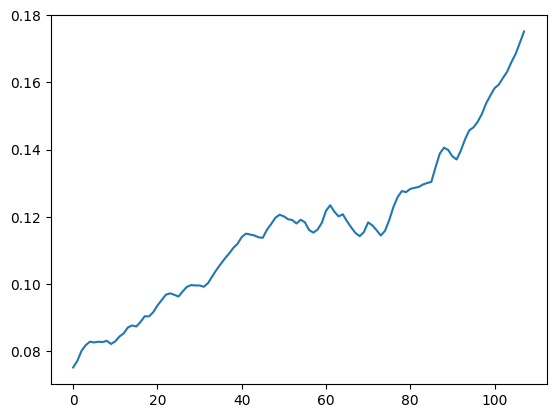

In [43]:
plt.plot(ref_vec)

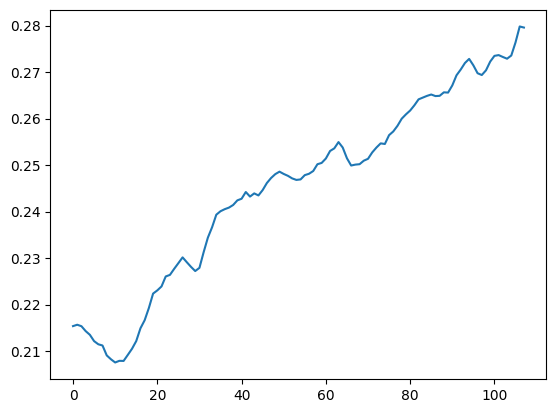

In [48]:
plt.plot(reflectance_vectors_noise_25['c1lm52c_Breccia__Lunar_Feldspathic_Regolith_Breccia__0.97_g'])

In [ ]:
cprms = []
for v in reflectance_vectors.values():
    cprms.append(spectral_angle_mapper(reflectance_image[7:115, 0, 0], v))

In [ ]:
cprms

In [ ]:
min_cprms_key = min(reflectance_vectors.keys(), key=lambda k: cprms[list(reflectance_vectors.keys()).index(k)])
min_cprms_key

In [ ]:
import matplotlib.pyplot as plt

plt.plot(reflectance_image[7:115, 0, 0])

In [ ]:
plt.plot(reflectance_vectors[min_cprms_key])

In [ ]:
plt.plot(reflectance_vectors[max_cprms_key])

# Torch Dataset

In [ ]:
import os
import numpy as np
import torchdata.datapipes as dp
from torch.utils.data import DataLoader

class SlidingWindowDataPipe(dp.iter.IterDataPipe):
    def __init__(self, image_paths, window_size, step_size):
        super().__init__()
        self.image_paths = image_paths
        self.window_size = window_size
        self.step_size = step_size

    def __iter__(self):
        for image_path in self.image_paths:
            shapes = SlidingWindowDataPipe.get_image_meta_data(image_path)
            for shape in shapes:
                _,img_height, img_width = shape
                # Sliding window
                for i in range(0, img_height - self.window_size + 1, self.step_size):
                    if i + self.window_size > img_height:
                        continue
                    patch = SlidingWindowDataPipe.get_partial_image_from_height(image_path,i,self.window_size)
                    yield patch
    @staticmethod
    def _read_partial_data_of_given_height(qub_path,image_height, image_width,row = 0, height = 250):
        image = []
        data_count = image_width * height
        channel_size = image_height * image_width
        with open(qub_path,'rb') as f:
            for channel_idx in range(256):
                offset = channel_idx * channel_size * 4 + row * image_width  # float32 has 4 bytes
                f.seek(offset)
                channel_data = np.fromfile(f, dtype=np.float32, count=data_count)
                image.append(channel_data.reshape((1,height, image_width)))
        return np.vstack(image)
    @staticmethod
    def get_partial_image_from_height(base_path, row, height):
        xml_files = utils.find_xml_files(base_path)
        image_files = utils.find_qub_files(base_path)
        shapes = [utils.extract_sequence_numbers(xml_file) for xml_file in xml_files]
        images = [utils._read_partial_data_of_given_height(qub_path,shape[1], shape[2], row, height) for qub_path,shape in zip(image_files,shapes)]
        return images
    @staticmethod
    def get_image_meta_data(base_path):
        xml_files = utils.find_xml_files(base_path)
        shapes = [utils.extract_sequence_numbers(xml_file) for xml_file in xml_files]
        return shapes
    

In [ ]:
data_paths = [
    "ENTER_LIST_OF_PATHS",
]

In [ ]:
datapipe = SlidingWindowDataPipe(
    image_paths=data_paths,
    window_size=250,
    step_size=250
)
dataloader = DataLoader(datapipe, batch_size=12, shuffle=True)
dataloader_iter = iter(dataloader)

### Example Usage of dataset

In [ ]:

dataloader_iter.__next__()

# ABS


In [29]:
def calculate_abs(f_n, r_n):
    return np.sum(np.abs(f_n - r_n))

In [30]:
abs_values = {}
abs_noise_25 = {}
abs_noise_5 = {}

for key1, key2, key3 in zip(reflectance_vectors.keys(), 
                            reflectance_vectors_noise_25.keys(), 
                            reflectance_vectors_noise_5.keys()):
    ref_vec = denoised_reflectance_image[7:115, 1000, 200]
    
    abs_values[key1] = calculate_abs(ref_vec, reflectance_vectors[key1])
    abs_noise_25[key2] = calculate_abs(ref_vec, reflectance_vectors_noise_25[key2])
    abs_noise_5[key3] = calculate_abs(ref_vec, reflectance_vectors_noise_5[key3])

In [31]:
abs_values

{'c2mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 3.0309330292966967,
 'bir1lm046_unbrecciated_lunar_meteorite__coarse_texture': 12.492682048995588,
 'c1lm36_Igneous__Lunar_Unbrecciated_Basalt_': 3.6990471664203888,
 'cclm35_Breccia__Lunar_Feldspathic_Breccia': 2.726251986159569,
 'c10l01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 8.174762611219567,
 'c3mb29_Silicate_(Ino)__Pyroxene__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 4.587674998395645,
 'colm01_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 8.405454563394146,
 'c12lm1_Antarctic_Meteorite_of_Presumed_Lunar_Origin': 3.8087252690275637,
 'c6mb29_Igneous__Gabbroic__A-881757_Lunar_Gabbrocontaining_Plag__Pyroxene_and_Ilmenite': 3.5941383237977513,
 'bir1lm048_Mare_basalt': 8.061934945022614,
 'cama01_Anomalous_(ACANOM)__Antarctic_meteorite_of_presumed_lunar_origin': 2.998137063170352,
 'calm34_Breccia__Lunar_Feldspathic_Breccia': 31.95410963954807,
 'cflm34_Breccia__Luna

In [32]:
temp = min(abs_values.values())
res = [key for key in abs_values if abs_values[key] == temp]

temp25 = min(abs_noise_25.values())
res25 = [key for key in abs_noise_25 if abs_noise_25[key] == temp25]

temp5 = min(abs_noise_5.values())
res5 = [key for key in abs_noise_5 if abs_noise_5[key] == temp5]


In [37]:
print(temp, res)
print(temp25, res25)
print(temp5, res5)

NameError: name 'prinarrowt' is not defined

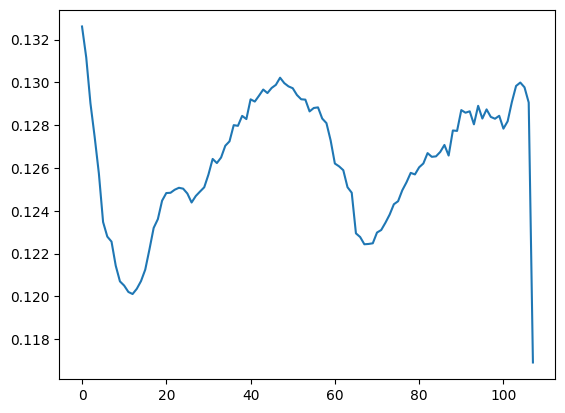

In [50]:
plt.plot(reflectance_vectors['c1lm52b_Breccia__Lunar_Feldspathic_Regolith_Breccia__0.97_g'])

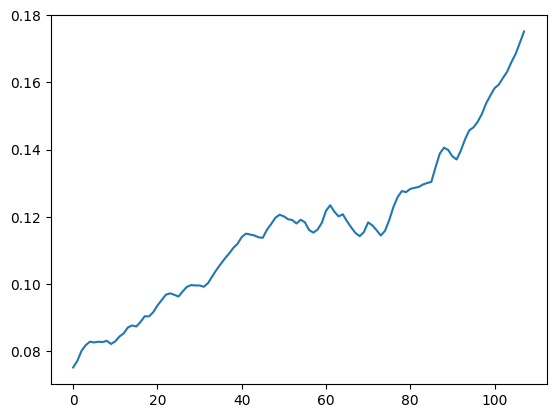

In [35]:
plt.plot(ref_vec)

In [57]:
diff = {}

for key in abs_noise_25.keys():
    diff[key] = abs_noise_25[key] + cprms_noise_25[key] * 100

In [58]:
temp25 = min(diff.values())
res25 = [key for key in diff if diff[key] == temp25]

In [59]:
res25

['calmcr_Antarctic_Meteorite_of_Presumed_Lunar_Origin']

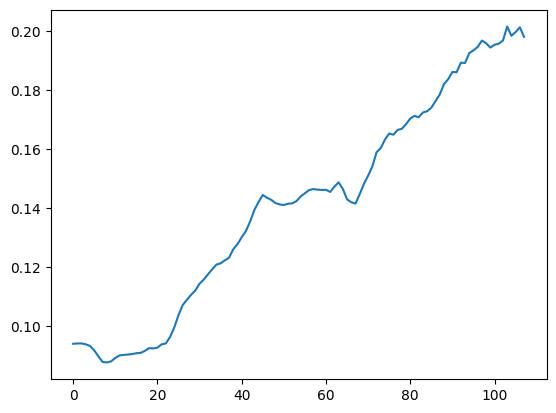

In [61]:
plt.plot(reflectance_vectors_noise_25['calmcr_Antarctic_Meteorite_of_Presumed_Lunar_Origin'])